In [1]:
import pandas as pd
import pickle
from db import DBHandler
import numpy as np
%matplotlib inline

In [2]:
### READ FROM CSV
csv_path = '../../database/dayli_collections/dayli_col.csv'

dtypes = {
    'user.id_str': str,
    'id_str': str,
    'text': str,
    'retweeted_status.id_str': str ,
    'retweeted_status.user.id_str': str,
    'retweet_count': int,
    'in_reply_to_status_id_str': str,
}
parse_dates = ['created_at', 'retweeted_status.created_at']
df = pd.read_csv(csv_path, dtype=dtypes, parse_dates=parse_dates)
df.rename(columns=lambda x: x.replace('.', '__'), inplace=True)

In [3]:
df.tail()

,created_at,user__id_str,id_str,text,retweeted_status__id_str,retweeted_status__user__id_str,retweeted_status__created_at,retweet_count,in_reply_to_status_id_str
378490,2018-11-04 01:00:00,118732136,1058886546021994496,Horror en San Marcos Sierras\nEl Show de la Ma...,NaN,NaN,NaT,0,NaN
378491,2018-11-04 00:00:00,118732136,1058871446255079424,Preocupan los casos de violencia intrafamiliar...,NaN,NaN,NaT,0,NaN
378492,2018-11-04 23:52:00,309812848,1059231820942794752,#LaCornisa Tras más de una década de apología ...,NaN,NaN,NaT,4,NaN
378493,2018-11-04 23:31:00,309812848,1059226536136658950,"Seguimos con un país en #LaCornisa, pero sólo ...",NaN,NaN,NaT,8,NaN
378494,2018-11-04 14:52:33,84644827,1059096066493239296,RT @Guillevelez1: Entre el nuevo álbum de Juan...,1055847600337887233,909103393,2018-10-26 15:44:19,2,NaN


In [6]:
### READ FROM MONGODB CONNECTION


# h = DBHandler(port=27017)

# columns = ['created_at', 'id_str', 'retweet_count', 'retweeted_status__id_str', 'retweeted_status__created_at']
# separator = '__'
# project = ({f_name: '$' + f_name.replace(separator, '.') for f_name in columns})
# project.update({'retweeted_status': '$retweeted_status.id_str'})


# cursor = h.tweet_collection.aggregate([
#     {'$project': project}
# ])
# df = pd.DataFrame(list(cursor))

# # datatype conversion
# datetime_cols = [c for c in df.columns if 'created_at' in c]
# for c in datetime_cols:
#     df[c] = pd.to_datetime(df[c])

conecting to db


{'created_at': '$created_at',
 'id_str': '$id_str',
 'retweet_count': '$retweet_count',
 'retweeted_status__id_str': '$retweeted_status.id_str',
 'retweeted_status__created_at': '$retweeted_status.created_at',
 'retweeted_status': '$retweeted_status.id_str'}

In [7]:
# usefull aliases
def df_only_rt():
    return df[df.retweeted_status__id_str.notna()]

def df_not_rt():
    return df[df.retweeted_status__id_str.isna()]

In [8]:
### Proporciones de RT sobre tweets totales
# TODO: plot this in some way
cant_rt = df_only_rt().shape[0]
cant_orig = df_not_rt().shape[0]
total = df.shape[0]
print('Cantidad de RT en el Dataset: {}\tCantidad de tweets originales: {}\tTotal: {}'.format(cant_rt, cant_orig, total))
print('Proporcion de RT sobre total: {}'.format(cant_rt / total))
print('Proporcion de Tweets originales sobre total: {}'.format(cant_orig / total))

Cantidad de RT en el Dataset: 110711	Cantidad de tweets originales: 267784	Total: 378495
Proporcion de RT sobre total: 0.2925032034769284
Proporcion de Tweets originales sobre total: 0.7074967965230716


In [9]:
### Promedio de retweets contando retweets
avg_retweets_all = df.retweet_count.mean()
print('Promedio de retweet counts (todo el dataset): {}'.format(avg_retweets_all))
### Promedio de retweets SIN retweets
avg_retweets_nort = df_not_rt().retweet_count.mean()
print('Promedio de retweet counts (solo tweets originales): {}'.format(avg_retweets_nort))
avg_retweets_onlyrt = df_only_rt().retweet_count.mean()
print('Promedio de retweet counts (solo retweets): {}'.format(avg_retweets_onlyrt))
# cual es la cuenta que debería dar??

Promedio de retweet counts (todo el dataset): 230.27960739243582
Promedio de retweet counts (solo tweets originales): 20.10311669106444
Promedio de retweet counts (solo retweets): 738.647352114966


In [6]:
### Ventanas de tiempo recogidas.
print('Tweet más temprano en el tiempo: {}'.format(df.created_at.min()))
print('Tweet más tardío en el tiempo: {}'.format(df.created_at.max()))
### TODO: lo mismo pero discriminado por usuario

Tweet más temprano en el tiempo: 2018-10-28 00:00:00
Tweet más tardío en el tiempo: 2018-11-04 23:59:56


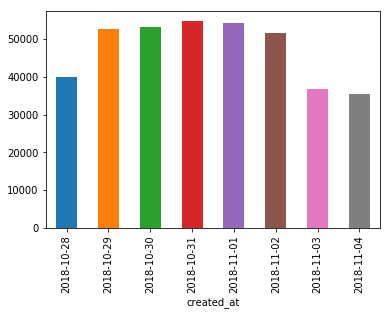

In [11]:
### histogram of all tweets by date
df.created_at.groupby(df["created_at"].dt.date).count().plot(kind="bar")

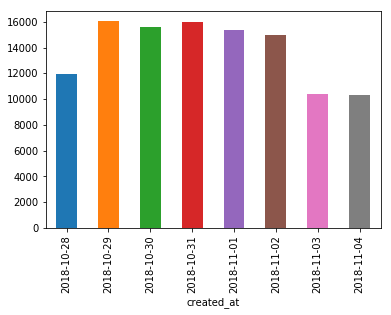

In [12]:
### only retweets
df.created_at.groupby(df_only_rt()["created_at"].dt.date).count().plot(kind="bar")

In [13]:
row_max_rt = df.retweet_count.idxmax()
print(df.iloc[row_max_rt, :])
print(row_max_rt)
print(type(row_max_rt))

created_at                                                      2018-10-29 14:35:04
user__id_str                                                               92430621
id_str                                                          1056917339290054656
text                              RT @ErickHdz56: Flip your phone upside down ht...
retweeted_status__id_str                                        1056643476840955905
retweeted_status__user__id_str                                   772540557289586689
retweeted_status__created_at                                    2018-10-28 20:26:51
retweet_count                                                                385289
in_reply_to_status_id_str                                                       NaN
Name: 49764, dtype: object
49764
<class 'int'>


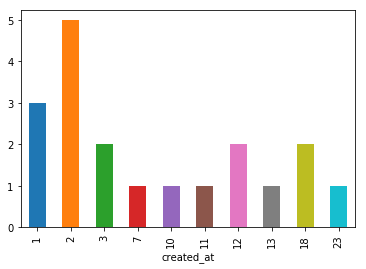

In [15]:
retweeted = df[df.retweeted_status__id_str == str(1056986168024330240)]
retweeted.created_at.groupby(retweeted["created_at"].dt.hour).count().plot(kind="bar")


/home/emanuel/.virtualenvs/sna-famaf/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


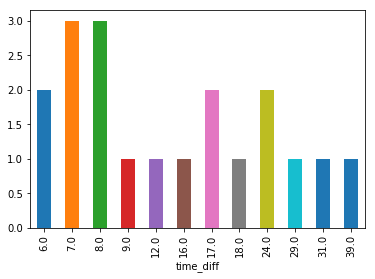

In [16]:
import numpy as np
retweeted = df[df.retweeted_status__id_str == str(1056986168024330240)]
retweeted['time_diff'] = retweeted.created_at - retweeted.retweeted_status__created_at
# retweeted.created_at.groupby(retweeted["created_at"].dt.hour).count().plot(kind="bar")
# retweeted.groupby(retweeted.time_diff.dt / np.timedelta64(1, 'D')).count().plot(kind="bar")
retweeted.time_diff.groupby((retweeted.time_diff / np.timedelta64(1, 'h')).round(0)).count().plot(kind="bar")

In [66]:
np.timedelta64(3, 'm')

numpy.timedelta64(3,'m')

In [34]:
top_retweeted = df.nlargest(10, 'retweet_count')

,_id,created_at,id_str,retweet_count,retweeted_status,retweeted_status__created_at,retweeted_status__id_str
49764,5bd7bd47ea61302900870c56,2018-10-29 14:35:04,1056917339290054656,385289,1056643476840955905,2018-10-28 20:26:51,1056643476840955905
185157,5bda6590ea6130079e644e4c,2018-10-31 02:18:03,1057456638439890949,323799,1056986168024330240,2018-10-29 19:08:34,1056986168024330240
174178,5bda63a0ea6130079e642369,2018-10-31 10:18:01,1057577426228776961,323712,1056986168024330240,2018-10-29 19:08:34,1056986168024330240
144863,5bd917e9ea613048d9e84750,2018-10-30 02:21:08,1057095025652350977,258793,1056986168024330240,2018-10-29 19:08:34,1056986168024330240
143782,5bd917c5ea613048d9e84317,2018-10-30 12:08:24,1057242817330855937,258741,1056986168024330240,2018-10-29 19:08:34,1056986168024330240
143743,5bd917c2ea613048d9e842f0,2018-10-30 03:55:24,1057118746739908610,258735,1056986168024330240,2018-10-29 19:08:34,1056986168024330240
142014,5bd9177fea613048d9e83c2f,2018-10-30 01:34:45,1057083352170278912,258637,1056986168024330240,2018-10-29 19:08:34,1056986168024330240
136832,5bd9165fea613048d9e827f1,2018-10-30 02:40:27,1057099886984867840,258257,1056986168024330240,2018-10-29 19:08:34,1056986168024330240
136156,5bd9163bea613048d9e8254d,2018-10-30 23:57:22,1057421232356749312,258189,1056986168024330240,2018-10-29 19:08:34,1056986168024330240
134167,5bd915bcea613048d9e81d88,2018-10-30 18:40:20,1057341447601561601,258001,1056986168024330240,2018-10-29 19:08:34,1056986168024330240
